# L4. Uninformed Search Strategies 

Solving Problems by Searching is not just a fundamental concept in the field of AI. This approach is widely used in various domains such as robotics, game playing, pathfinding, and automated planning.

In this assignment, we will design a maze generator that creates a unique maze on each run, along with an agent that finds its way from the starting state to the target state using uninformed search strategies.

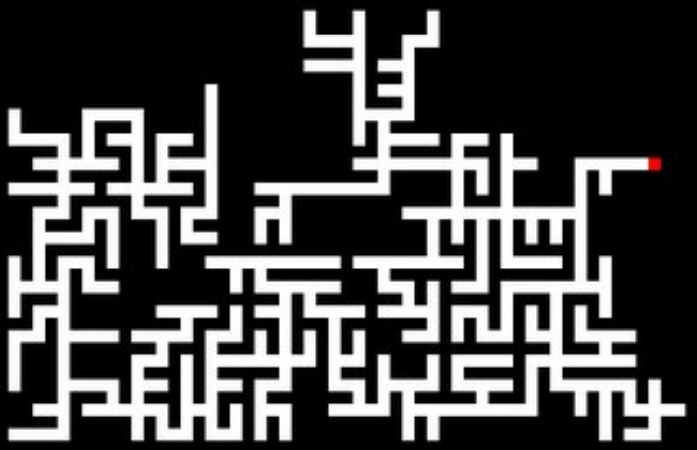

## Maze & State Space

Mazes are a classic example of a state-space search problem in AI. 

* **State**: Each position in the maze (e.g., a specific grid cell) represents a state.
* **Actions**: The ***possible*** moves an agent can make from a given state, such as moving *up, down, left*, or *right*.
* **Goal**: The state where the agent needs to arrive, such as the maze's exit or the cell with a treasure.

Besides maze games, maze generation has all sorts of applications, including but not limited to:
* Creating terrain with obstacles
* Creating the layout of rooms in a dungeon crawler
* Generating puzzles
* Generating cool visuals
* Teaching graph algorithms 
       

### Maze generator

To generate a maze, you can use algorithms (there are MANY maze generation algorithms)
* Depth First Search

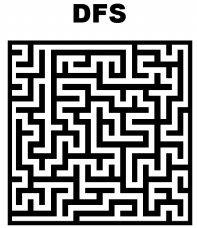

* Prim’s Algorithm

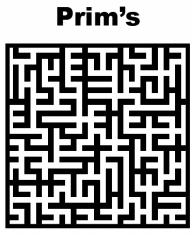

* Kruskal’s Algorithm (Kruskal looks the same as Prim’s)

* Eller’s Algorithm (extremely high complexity)

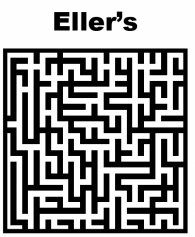

OR you can develop your own simple Maze generator (as we are going to do).

The `maze` can be represented as a `2D array`, where:
* 0 represents a wall , 
* and 1 represents an open path.

In [1]:
n=4

In [2]:
from src.mazeData import makeMaze

In [3]:
maze1=makeMaze(n)
maze1

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

Now we nee to define actions.

If define possible actions based on the locaion of the cell, like the following one:

In [4]:
from src.mazeData import defineMazeActions

In [5]:
mazeALLActs=defineMazeActions(maze1)
mazeALLActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right', 'down'],
 (1, 3): ['left', 'up', 'down'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'up', 'right', 'down'],
 (2, 3): ['left', 'up', 'down'],
 (3, 0): ['up', 'right'],
 (3, 1): ['left', 'up', 'right'],
 (3, 2): ['left', 'up', 'right'],
 (3, 3): []}

!!! BUT This means that all cells in any possible maze will have the same set of actins regardless the structure of the maze.

In [6]:
from src.mazeData import defineMazeAvailableActions

In [7]:
mazeAvalActs=defineMazeAvailableActions(maze1)
mazeAvalActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right', 'down'],
 (1, 3): ['left', 'up'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'up'],
 (2, 3): [],
 (3, 0): ['up', 'right'],
 (3, 1): ['left', 'up'],
 (3, 2): [],
 (3, 3): []}

In [8]:
maze1

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

Next we need to define the **Transition (Transformation) Model (TM)**

Transition Model: Describes what each action does. RESULT(s, a) returns the state that results from performing action "a" in state "s".

In [9]:
from src.mazeData import makeMazeTransformationModel

Since the TM describes what each action does the set of available actions is used as a input for it.

In [10]:
maze1TM=makeMazeTransformationModel(mazeAvalActs)
maze1TM

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'up': (1, 2)},
 (2, 3): {},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1)},
 (3, 2): {},
 (3, 3): {}}

The data above is our graph data to build the `MazeGraph`

### Maze Graph

In [11]:
from src.graphProblemClass import GraphProblem

Based on this dictionary we need to build a graph
* !!! Check the `Graph class`

However, we need to create the derived class - `mazeGraph`

In [12]:
from src.maze2025GraphClass import mazeGraph

In [13]:
from src.mazeData import mazeStatesLocations

In [14]:
list(maze1TM.keys())

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [15]:
mazeWorldGraph = mazeGraph(maze1TM, mazeStatesLocations(list(maze1TM.keys())))

In [16]:
mazeWorldGraph.nodes()

[(0, 1),
 (1, 2),
 (2, 1),
 (0, 0),
 (3, 1),
 (1, 1),
 (0, 3),
 (2, 0),
 (3, 0),
 (0, 2),
 (2, 2),
 (1, 0),
 (1, 3)]

In [17]:
mazeWorldGraph.graph_dict

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1, (1, 2): 1},
 (0, 3): {(0, 2): 1, (1, 3): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (1, 2): 1, (2, 1): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 3): 1, (2, 2): 1},
 (1, 3): {(1, 2): 1, (0, 3): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (1, 2): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1}}

In [18]:
mazeWorldGraph.origin

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'up': (1, 2)},
 (2, 3): {},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1)},
 (3, 2): {},
 (3, 3): {}}

In [19]:
mazeWorldGraph.locations

{(0, 0): (0, 0),
 (0, 1): (50, 0),
 (0, 2): (100, 0),
 (0, 3): (150, 0),
 (1, 0): (0, 50),
 (1, 1): (50, 50),
 (1, 2): (100, 50),
 (1, 3): (150, 50),
 (2, 0): (0, 100),
 (2, 1): (50, 100),
 (2, 2): (100, 100),
 (2, 3): (150, 100),
 (3, 0): (0, 150),
 (3, 1): (50, 150),
 (3, 2): (100, 150),
 (3, 3): (150, 150)}

In [20]:
mazeWorldGraph.get((0, 1), (0,2))

1

Let's try to show the graph of our Maze

In [22]:
from pyvis.network import Network 

In [23]:
net_maze = Network( heading="Lab4. Examples of Maze World Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%" 
) # do this


In [24]:
mazeWorldGraph.origin

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'up': (1, 2)},
 (2, 3): {},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1)},
 (3, 2): {},
 (3, 3): {}}

In [25]:
maze1

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

In [26]:
maze1[0,1]

np.int64(1)

In [27]:
nodeColors={
    "wall":"red",
    "path": "white"
}

In [28]:
nodeColorsList=[]

for node in mazeWorldGraph.origin.keys():
    if maze1[node[0],node[1]]==1:
        nodeColorsList.append(nodeColors["path"])
    else:
        nodeColorsList.append(nodeColors["wall"])
nodeColorsList

['white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white']

In [29]:
nodes=["-".join(str(item) for item in el) for el in mazeWorldGraph.origin.keys()]
nodes

['0-0',
 '0-1',
 '0-2',
 '0-3',
 '1-0',
 '1-1',
 '1-2',
 '1-3',
 '2-0',
 '2-1',
 '2-2',
 '2-3',
 '3-0',
 '3-1',
 '3-2',
 '3-3']

In [30]:
x_coords = []
y_coords = []

for node in mazeWorldGraph.origin.keys():
    x,y=mazeWorldGraph.getLocation(node)
    x_coords.append(x)
    y_coords.append(y)

print(x_coords)   
print(y_coords)


[0, 50, 100, 150, 0, 50, 100, 150, 0, 50, 100, 150, 0, 50, 100, 150]
[0, 0, 0, 0, 50, 50, 50, 50, 100, 100, 100, 100, 150, 150, 150, 150]


In [31]:
sizes=[10]*len(nodes)
sizes

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [32]:
#hidden labels, and hover titles
net_maze.add_nodes(nodes, color=nodeColorsList, x=x_coords, y=y_coords, size=sizes, title=nodes)

In [33]:
for node in net_maze.nodes:
    node['label']=''

In [34]:
net_maze.nodes

[{'color': 'white',
  'x': 0,
  'y': 0,
  'size': 10,
  'title': '0-0',
  'id': '0-0',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 50,
  'y': 0,
  'size': 10,
  'title': '0-1',
  'id': '0-1',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 100,
  'y': 0,
  'size': 10,
  'title': '0-2',
  'id': '0-2',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 150,
  'y': 0,
  'size': 10,
  'title': '0-3',
  'id': '0-3',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 0,
  'y': 50,
  'size': 10,
  'title': '1-0',
  'id': '1-0',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 50,
  'y': 50,
  'size': 10,
  'title': '1-1',
  'id': '1-1',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 100,
  'y': 50,
  'size': 10,
  'title': '1-2',
  'id': '1-

In [35]:
mazeWorldGraph.origin[(0,0)]

{'right': (0, 1), 'down': (1, 0)}

In [36]:
from src.mazeData import intTupleTostr

In [37]:
intTupleTostr((0,0))

'0-0'

In [38]:
edge_weights = {(intTupleTostr(k), intTupleTostr(v2)) : k2 for k, v in mazeWorldGraph.origin.items() for k2, v2 in v.items()}#actions
edge_weights

{('0-0', '0-1'): 'right',
 ('0-0', '1-0'): 'down',
 ('0-1', '0-0'): 'left',
 ('0-1', '0-2'): 'right',
 ('0-1', '1-1'): 'down',
 ('0-2', '0-1'): 'left',
 ('0-2', '0-3'): 'right',
 ('0-2', '1-2'): 'down',
 ('0-3', '0-2'): 'left',
 ('0-3', '1-3'): 'down',
 ('1-0', '0-0'): 'up',
 ('1-0', '1-1'): 'right',
 ('1-0', '2-0'): 'down',
 ('1-1', '1-0'): 'left',
 ('1-1', '0-1'): 'up',
 ('1-1', '1-2'): 'right',
 ('1-1', '2-1'): 'down',
 ('1-2', '1-1'): 'left',
 ('1-2', '0-2'): 'up',
 ('1-2', '1-3'): 'right',
 ('1-2', '2-2'): 'down',
 ('1-3', '1-2'): 'left',
 ('1-3', '0-3'): 'up',
 ('2-0', '1-0'): 'up',
 ('2-0', '2-1'): 'right',
 ('2-0', '3-0'): 'down',
 ('2-1', '2-0'): 'left',
 ('2-1', '1-1'): 'up',
 ('2-1', '2-2'): 'right',
 ('2-1', '3-1'): 'down',
 ('2-2', '2-1'): 'left',
 ('2-2', '1-2'): 'up',
 ('3-0', '2-0'): 'up',
 ('3-0', '3-1'): 'right',
 ('3-1', '3-0'): 'left',
 ('3-1', '2-1'): 'up'}

In [39]:
mazeWorldGraph.nodes()

[(0, 1),
 (1, 2),
 (2, 1),
 (0, 0),
 (3, 1),
 (1, 1),
 (0, 3),
 (2, 0),
 (3, 0),
 (0, 2),
 (2, 2),
 (1, 0),
 (1, 3)]

In [40]:
edges=[]

for node_source in mazeWorldGraph.nodes():
    for node_target, action in mazeWorldGraph.get(node_source).items():
        #node_target or node_source is a tuple -> convert to str
        if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges and (intTupleTostr(node_target), intTupleTostr(node_source)):
            net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), label=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))])
            edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))
            



In [41]:
# Disable physics
net_maze.toggle_physics(False)
net_maze.show("graph1.html", notebook=False)

graph1.html


In [42]:
maze1

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

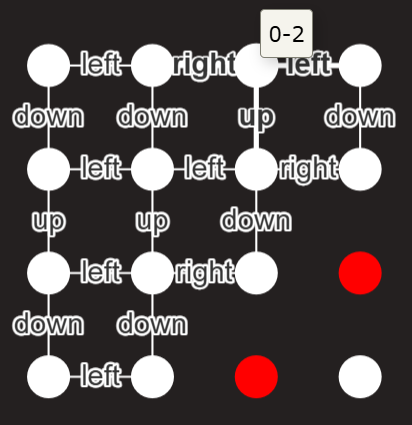

### Maze Problem formulation

Explore the derived *class MazeProblem(Problem)* for our Maze World example

In [43]:
from src.mazeProblemClass import MazeProblem

In [44]:
initState, goalState=(0,1),(0,3)

In [45]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph)

In [46]:
testState=(0,2)

In [47]:
mp1.actions(testState)

['left', 'right', 'down']

## Problem Solving Agent in Maze

Now we are ready to consider `MazeProblemSolvingAgent class`

Explore the derived class `VacuumProblem(Problem)` for our Vacuum World example

However, we also need to check how our `BestFirstSearchAgentProgram` is able to process Maze World

In [53]:
from src.PS_agentPrograms import BestFirstSearchAgentProgram

In [49]:
BFSAP1=BestFirstSearchAgentProgram()

In [50]:
mp1.initial #mp1 instance of Maze Problem

(0, 1)

In [51]:
seq=BFSAP1(mp1)

The <Node (0, 1)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!


In [55]:
from src.agents import ProblemSolvingMazeAgentBFS

In [56]:
BFS_MazeAgent1=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [57]:
BFS_MazeAgent1.goal

(0, 3)

In [58]:
testNode=(0,2)

In [59]:
BFS_MazeAgent1(testNode)

The <Node (0, 2)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 1)> is being pushed to frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['right']


!!!!!!!!!!!!!!!!!!!!!

Our Agent uses BFS as a search algorithm 

With **BFS** we choose a node, n, with minimum value of some evaluation function, f(n).

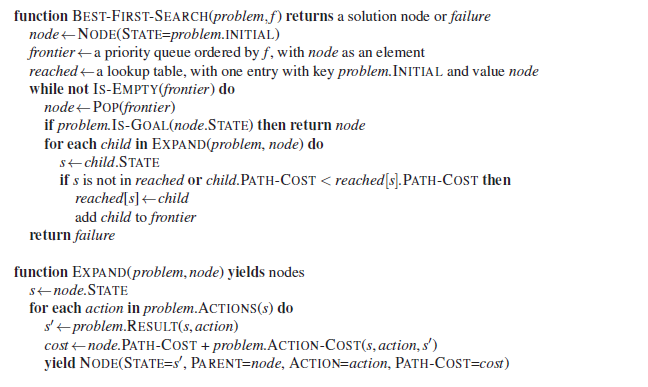

Let's create the environment for our Maze

In [60]:
from src.naigationEnvironmentClass import MazeNavigationEnvironment

In [102]:
maze_Env1=MazeNavigationEnvironment(mazeWorldGraph)

In [88]:
maze_Env1.status.graph_dict

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1, (1, 2): 1},
 (0, 3): {(0, 2): 1, (1, 3): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (1, 2): 1, (2, 1): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 3): 1, (2, 2): 1},
 (1, 3): {(1, 2): 1, (0, 3): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (1, 2): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1}}

In [89]:
BFS_MazeAgent2=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [90]:
BFS_MazeAgent2.performance

13

In [91]:
print(initState,goalState)

(0, 1) (0, 3)


In [92]:
intTupleTostr(goalState)

'0-3'

In [72]:
nodeColors

{'wall': 'red', 'path': 'white'}

In [74]:
nodeColors.setdefault('goal', "green")
nodeColors.setdefault('init', "gold")
nodeColors

{'wall': 'red', 'path': 'white', 'goal': 'green', 'init': 'gold'}

In [75]:
for node in net_maze.nodes:
    if node['id']==intTupleTostr(goalState):
        node['color']=nodeColors['goal']
    elif node['id']==intTupleTostr(initState):
        node['color']=nodeColors['init']

In [76]:
net_maze.show("graphMaze1.html", notebook=False)

graphMaze1.html


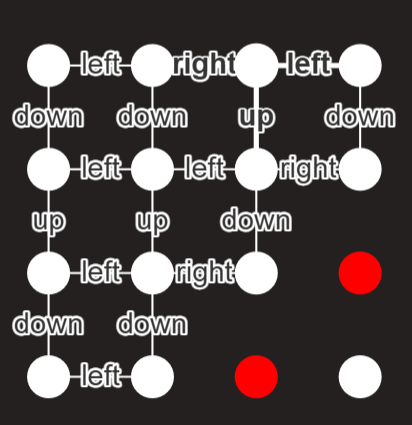  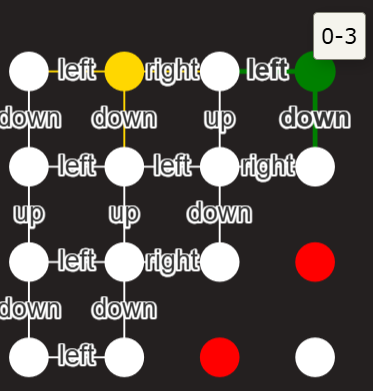

**!!!** As you can see the visualization of our Maze (above) is not complete enough (not all available actions are visible).
**You need to resolve this in your implementation.**

When we add the PS Agent into the Nav.Env. it should run its call() method 

In [93]:
maze_Env1.add_thing(BFS_MazeAgent2)

The <Node (0, 1)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
The Agent in (0, 1) with performance 13


In [94]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 12


In [95]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 11
Agent reached all goals


In [96]:
maze_Env1.step()

There is no one here who could work...


In [97]:
testState=(2,2)

In [103]:
BFSnavAgent3=ProblemSolvingMazeAgentBFS(testState,mazeWorldGraph,goalState)

In [99]:
BFSnavAgent3.state

(2, 2)

In [104]:
maze_Env1.add_thing(BFSnavAgent3)

The <Node (2, 2)> is being pushed to frontier ...
The <Node (2, 2)> is being extracted from frontier ...
The child <Node (2, 1)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (1, 2)> is being extracted from frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 3)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 1)> is being pushed to frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['up', 'u

In [105]:
maze_Env1.run()

step 1:
Agent decided to do up.
Agent in up with performance = 12
step 2:
Agent decided to do up.
Agent in up with performance = 11
step 3:
Agent decided to do right.
Agent in right with performance = 10
Agent reached all goals


## Task. Asteroid Maze & Satellites

In this assignment a Satellite (Agent) is trying to navigate (find the shortest route from a starting cell to a target cell) in Space (asteroid maze environment).

The Satellite Agent must avoid obstacles - asteroids ("walls" in classic maze).

1. Model a Asteroid Maze Problem by having a node for a starting point, a finishing point, and all the points in the maze where more than one path can be taken, and then connecting the vertices according to the paths in the maze.

Generate a random Maze with size (7,7) as a Numpy matrix, which includes 25% of occupied cells (with asteroids).and 10% of enemies.

Visualize the this asteroid maze environment.

2. A framework consists of an Asteroid Environment and an Satellite Agent which acts in this environment. In our case the environment is a classical square maze with 3 types of cells:

* available to visit it (but can include an enemy spaceship),
* occupied with an asteroid,
* target.

An enemy spaceship is a subclass of Thing. It has a power attirbute (values are randomly generated in the range 10%-40% of the N of nodes in the state space).

The Sattelite can start from any free cell and is allowed to travel on the free cells only.

Our agent's sole purpose in life is to land on Earth

We have exactly 4 actions which we must encode as integers 0-3:

* 0 - left
* 1 - up
* 2 - right
* 3 - down

Develop a transition model according to the description above.


The locations of enemy spaceships are unknown. 

However, if an enemy ship, with at least twice the power of the Satellite Agent preformance, is at the Agent's current location, the enemy ship will capture the Satellite (the Agent will die).

When a Satellite Agent encounters an enemy ship, it will activate a "defense" mode (if its performance allows it, see the rule above), which consumes 10% of its current performance. While in "defense" mode, the agent can continue moving through the cell containing the enemy.

3. Implement the Satellite Agent (based on Uniform-cost ).

For Uniform-cost Search apply BEST-FIRST-SEARCH with PATH-COST as the evaluation function.

PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.

4. Implement the web-service to move the Satellite Agent step by step with an appropriate visualization of this process.

!!! Initially the Agent's performace is 50% of the number of nodes.